Data analysis of service request (311) calls from New York City


TASKS TO BE PERFORMED

1. Understand the dataset:

    a.Identify the shape of the dataset

    b.Identify variables with null values

2. Perform basic data exploratory analysis:

    a.Utilize missing value treatment

    b.Analyze the date column and remove the entries if it has an incorrect timeline

    c.Draw a frequency plot for city-wise complaints

    d.Draw scatter and hexbin plots for complaint concentration across Brooklyn

3. Find major types of complaints:

    a.Plot a bar graph of count vs. complaint types

    b.Find the top 10 types of complaints

    c.Display the types of complaints in each city in a separate dataset

4. Visualize the major types of complaints in each city

5. Check if the average response time across various types of complaints

6. Identify significant variables by performing a statistical analysis using p-values and chi-square values (Optional)

# Understanding the dataset 
## To understand the DATA SET, shape, info, describe, head, dtypes, unique and isna functions are used. 

In [1]:
#importing required libraies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#importing the dataset
df=pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head(5)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [4]:
#to know the shape of the DATA SET
df.shape

(364558, 53)

###### OBSERVATION: 

###### The Data Set has 364558 rows and 53 columns

In [5]:
df.info

<bound method DataFrame.info of         Unique Key            Created Date             Closed Date Agency  \
0         32310363  12/31/2015 11:59:45 PM  01/01/2016 12:55:15 AM   NYPD   
1         32309934  12/31/2015 11:59:44 PM  01/01/2016 01:26:57 AM   NYPD   
2         32309159  12/31/2015 11:59:29 PM  01/01/2016 04:51:03 AM   NYPD   
3         32305098  12/31/2015 11:57:46 PM  01/01/2016 07:43:13 AM   NYPD   
4         32306529  12/31/2015 11:56:58 PM  01/01/2016 03:24:42 AM   NYPD   
...            ...                     ...                     ...    ...   
364553    29609918  01/01/2015 12:04:44 AM  01/01/2015 10:22:31 AM   NYPD   
364554    29608392  01/01/2015 12:04:28 AM  01/01/2015 02:25:02 AM   NYPD   
364555    29607589  01/01/2015 12:01:30 AM  01/01/2015 12:20:33 AM   NYPD   
364556    29610889  01/01/2015 12:01:29 AM  01/01/2015 02:42:22 AM   NYPD   
364557    29611816  01/01/2015 12:00:50 AM  01/01/2015 02:47:50 AM   NYPD   

                            Agency Name    

In [6]:
df.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude
count,3.645580e+05,361560.000000,3.605280e+05,360528.000000,0.0,0.0,0.0,0.0,0.0,360528.000000,360528.000000
mean,3.106595e+07,10858.496659,1.005043e+06,203425.305782,NaN,NaN,NaN,NaN,NaN,40.724980,-73.924946
std,7.331531e+05,578.263114,2.196362e+04,29842.192857,NaN,NaN,NaN,NaN,NaN,0.081907,0.079213
min,2.960737e+07,83.000000,9.133570e+05,121185.000000,NaN,NaN,NaN,NaN,NaN,40.499040,-74.254937
25%,3.049938e+07,10314.000000,9.919460e+05,182945.000000,NaN,NaN,NaN,NaN,NaN,40.668742,-73.972253
50%,3.108795e+07,11209.000000,1.003470e+06,201023.000000,NaN,NaN,NaN,NaN,NaN,40.718406,-73.930643
75%,3.167433e+07,11238.000000,1.019134e+06,222790.000000,NaN,NaN,NaN,NaN,NaN,40.778166,-73.874098
max,3.231065e+07,11697.000000,1.067186e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700715


In [7]:
df.isna().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

In [8]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

###### Dropping columns with Insufficient data

In [9]:
df.drop(['Intersection Street 1', 'Intersection Street 2', 'Landmark', 'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction', 'Ferry Terminal Name'],axis=1,inplace=True)

In [10]:
df.shape

(364558, 39)

In [11]:
df.isna().sum()

Unique Key                            0
Created Date                          0
Closed Date                        2381
Agency                                0
Agency Name                           0
Complaint Type                        0
Descriptor                         6501
Location Type                       133
Incident Zip                       2998
Incident Address                  51699
Street Name                       51699
Cross Street 1                    57188
Cross Street 2                    57805
Address Type                       3252
City                               2997
Facility Type                      2389
Status                                0
Due Date                              3
Resolution Description                0
Resolution Action Updated Date     2402
Community Board                       0
Borough                               0
X Coordinate (State Plane)         4030
Y Coordinate (State Plane)         4030
Park Facility Name                    0


###### Dropping columns irrelevant for analysis

###### With respect to the tasks asked to perform, some of the columns are irrelevant for analysis. Hence, those columns are dropped in the following steps.

In [12]:
df.drop(['Status', 'Due Date', 'Resolution Description', 'Resolution Action Updated Date', 'Community Board', 'Borough', 'Park Facility Name', 'Park Borough', 'School Name', 'School Number', 'School Region', 'School Code', 'School Phone Number', 'School Address', 'School City', 'School State', 'School Zip', 'School Not Found', 'Latitude', 'Longitude'],axis=1,inplace=True)


In [13]:
df.shape

(364558, 19)

In [14]:
df.drop(['Unique Key', 'Agency', 'Agency Name', 'Descriptor', 'Location Type', 'Cross Street 1', 'Street Name', 'Address Type', 'Cross Street 2', 'Facility Type'],axis=1,inplace=True)


In [15]:
df.drop(['X Coordinate (State Plane)', 'Y Coordinate (State Plane)'],axis=1, inplace=True)


In [16]:
#Finding Null Value in the remaining columns(columns remaining after droping insufficient data columns and columns irrelevant for analysis)
df.isna().sum()

Created Date            0
Closed Date          2381
Complaint Type          0
Incident Zip         2998
Incident Address    51699
City                 2997
Location             4030
dtype: int64

# NULL VALUE TREATMENT:

## The following data shows the columns required for analysis and the number of null values in the columns respectively.

1. Created Date - 0
2. Closed Date - 2381
3. Complaint Type - 0
4. Incident Zip  - 2998
5. Incident Address  - 51699
6. City  - 2997
7. Location  - 4030

## The number of null values in each column is very less when compared to the total entries in these columns (Incident Address column has 14 percent null values and Incident Zip, Location, City, and Closed Date have less than 1 percent null values). 

## Therefore, we will drop the rows with null values in these columns and take the remaining rows in these columns for analysis.


In [17]:
#Dropping null values
df.dropna(inplace=True)

In [18]:
df.isna().sum()

Created Date        0
Closed Date         0
Complaint Type      0
Incident Zip        0
Incident Address    0
City                0
Location            0
dtype: int64

In [19]:
df.shape

(308777, 7)

###### OBSERVATION: 

###### Shape of the dataset after dropping Null values, insufficient data columns and irrelavant columns: 

###### 1. Number of Rows : 308777
###### 2. Number of Columns : 7

In [20]:
df.head(5)

,Created Date,Closed Date,Complaint Type,Incident Zip,Incident Address,City,Location
0,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,Noise - Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,NEW YORK,"(40.86568153633767, -73.92350095571744)"
1,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,Blocked Driveway,11105.0,27-07 23 AVENUE,ASTORIA,"(40.775945312321085, -73.91509393898605)"
2,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,Blocked Driveway,10458.0,2897 VALENTINE AVENUE,BRONX,"(40.870324522111424, -73.88852464418646)"
3,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,Illegal Parking,10461.0,2940 BAISLEY AVENUE,BRONX,"(40.83599404683083, -73.82837939584206)"
4,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,Illegal Parking,11373.0,87-14 57 ROAD,ELMHURST,"(40.733059618956815, -73.87416975810375)"


# Analyzing the date column and remove the entries if it has an incorrect timeline
##### An incorrect timeline error occurs when the date/time in the 'Closed Date' column has a date/time, preceding the date in the 'Created Date' column. To check incorrect timeline, following steps are performed. If there is no negative value in the Time Difference column, we can conclude that the dates present in the DateTime column follow the proper timeline.
1. Convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and then to integers.
2. Create a new column ‘Time_Difference’.3. Time_Difference = Closed Date - Created Date

In [21]:
df_timeline=df[['Created Date', 'Closed Date']]
df_timeline['Created Date']=pd.to_datetime(df_timeline['Created Date'])
df_timeline['Closed Date']=pd.to_datetime(df_timeline['Closed Date'])
df_timeline_new=pd.DataFrame(df_timeline)
df_timeline_new['Created Date in Hours']=np.around((df_timeline_new['Created Date'].astype(np.int64)/(pow(10,9)*3600) ), decimals=2)
df_timeline_new['Closed Date in Hours']=np.around((df_timeline_new['Closed Date'].astype(np.int64)/(pow(10,9)*3600) ), decimals=2)
df_timeline_new['Time Difference']= df_timeline_new['Closed Date in Hours']-df_timeline_new['Created Date in Hours']
for i in df_timeline_new['Time Difference']:
    if i <= 0:
        print ('There is incorrect Timeline')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#### OBSERVATION: Since the above code did not return any negative values. We can conclude that there is no incorrect timeline.

# Frequency plot for city-wise complaints

Text(0.5, 1.0, 'NUMBER OF COMPLAINTS IN EACH CITIES')

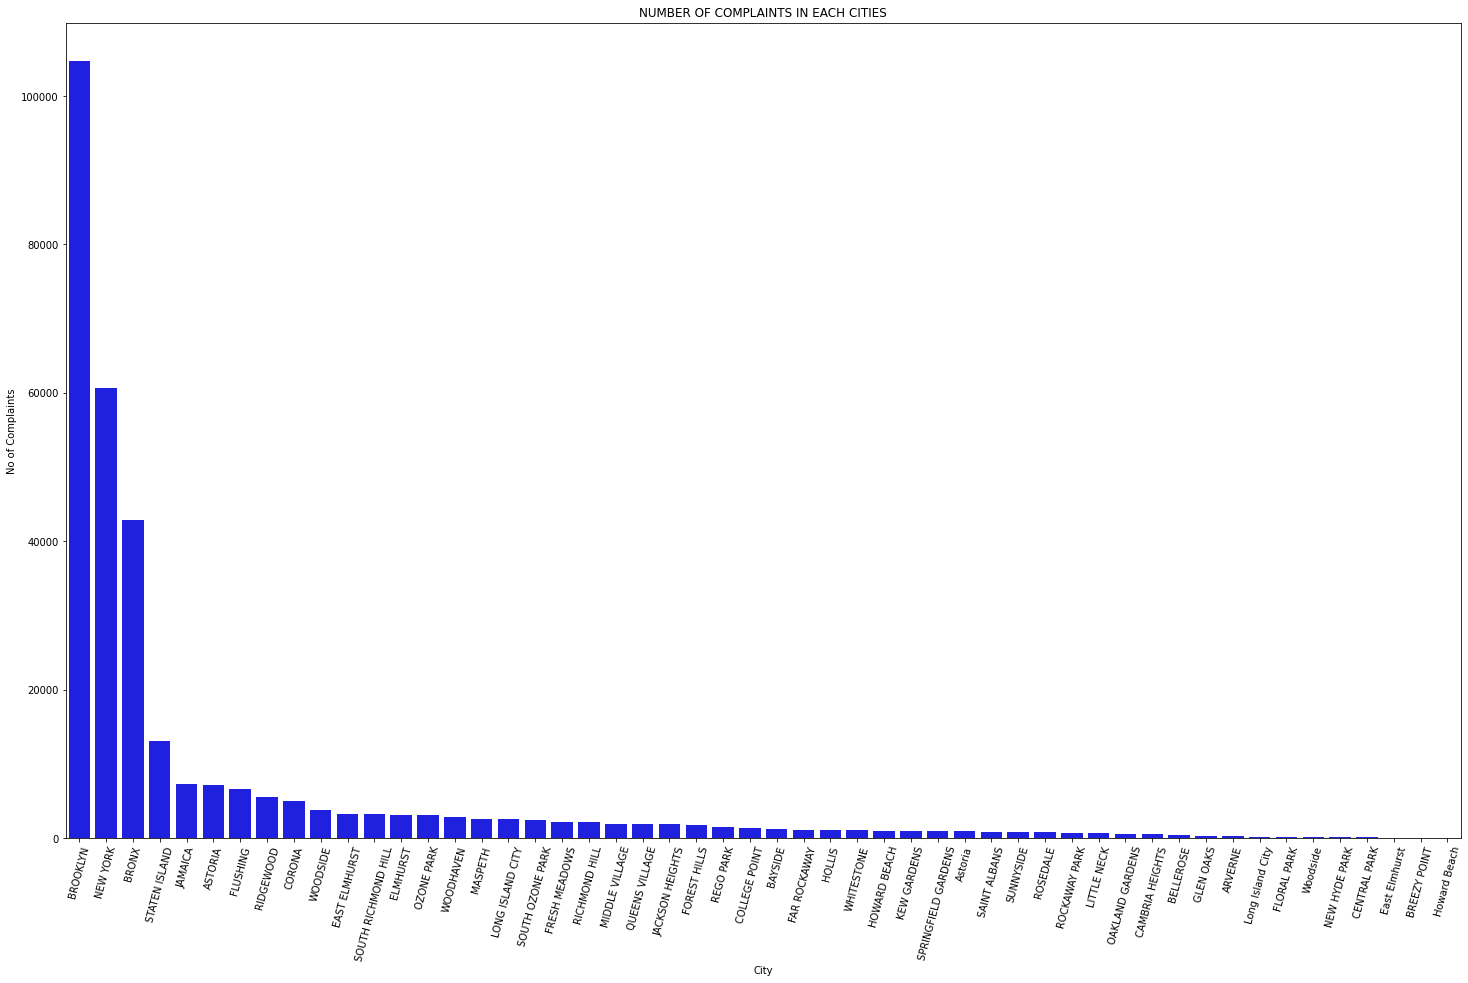

In [22]:
df_CityWise_Complaint=df[['City', 'Complaint Type']].groupby(['City']).size().reset_index()
df_CityWise_Complaint.rename(columns={'Complaint Count':'City',0:'Count'},inplace=True)
df_CityWise_ComplaintCount=df_CityWise_Complaint.sort_values(by='Count', ascending = False)
df_CityWise_ComplaintCount

plt.figure(figsize = (25, 15))
sns.barplot(x=df_CityWise_ComplaintCount['City'], y= df_CityWise_ComplaintCount['Count'], color= 'b')
plt.ylabel("No of Complaints")
plt.xlabel("City")
plt.xticks(rotation=75)
plt.title("NUMBER OF COMPLAINTS IN EACH CITIES")

In [23]:
df_CityWise_ComplaintCount

,City,Count
7,BROOKLYN,104668
33,NEW YORK,60718
6,BRONX,42914
46,STATEN ISLAND,13122
25,JAMAICA,7233
1,ASTORIA,7095
17,FLUSHING,6590
39,RIDGEWOOD,5554
11,CORONA,4993
50,WOODSIDE,3724


# Scatter and Hexbin plots for complaint concentration across Brooklyn

In [24]:
df_Brooklyn=df[df['City']=='BROOKLYN']
df_ZipWise_ComplaintCount=df_Brooklyn[['Incident Zip', 'Complaint Type']].groupby(['Incident Zip']).size().reset_index().sort_values(by=0)
df_ZipWise_ComplaintCount.rename(columns={0:'Complaint Count'}, inplace=True)

Text(0.5, 0, 'Incident Zip')

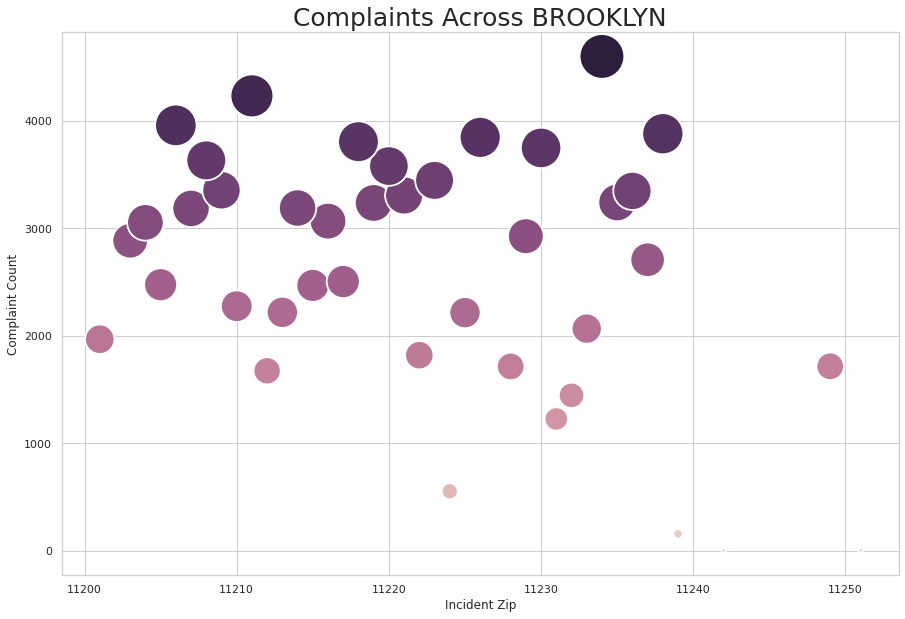

In [25]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(data=df_ZipWise_ComplaintCount, x="Incident Zip", y="Complaint Count", legend=False, sizes=(20, 2000), ax=ax, size='Complaint Count', hue='Complaint Count')
ax.set_title('Complaints Across BROOKLYN', fontsize = 25)
ax.set_ylabel("Complaint Count", alpha=1)
ax.set_xlabel("Incident Zip", alpha=1)


Text(0, 0.5, 'Complaint Count')

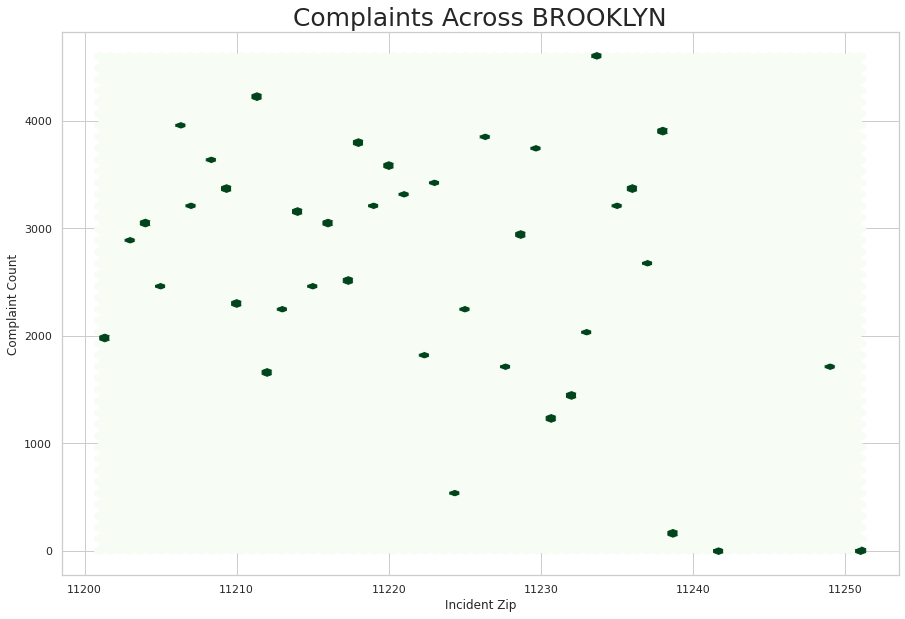

In [26]:
f, ax = plt.subplots(figsize=(15, 10))
plt.hexbin(x=df_ZipWise_ComplaintCount['Incident Zip'], y=df_ZipWise_ComplaintCount['Complaint Count'], gridsize = 75, cmap ='Greens')
ax.set_title('Complaints Across BROOKLYN', fontsize = 25)
ax.set_xlabel("Incident Zip", alpha=1)
ax.set_ylabel("Complaint Count", alpha=1)


# Bar graph of count vs. complaint types

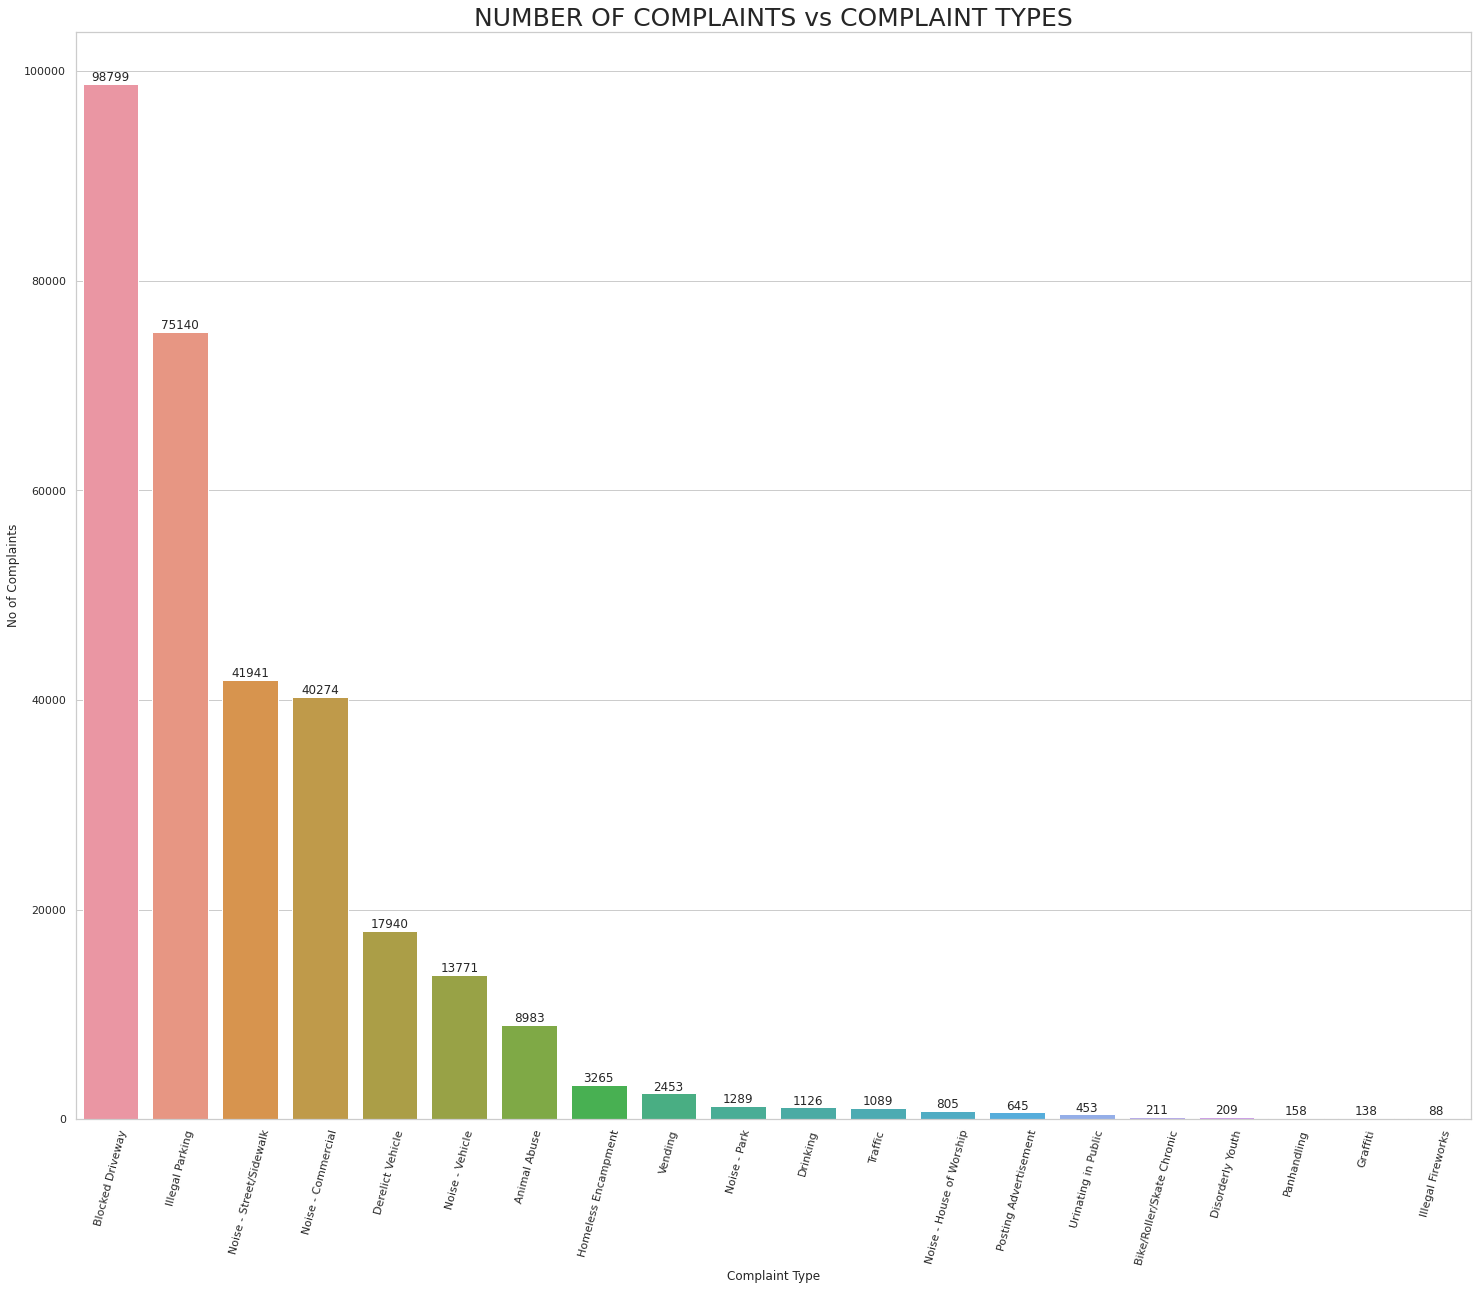

In [27]:
df_ComplaintCount=df['Complaint Type'].value_counts()
df_ComplaintCount=df_ComplaintCount.to_frame().reset_index()
df_ComplaintCount.rename(columns={'index':'Complaint Type', 'Complaint Type':'Count'},inplace=True)
df_ComplaintCount

plt.figure(figsize = (25, 20))
ax=sns.barplot(x=df_ComplaintCount['Complaint Type'], y=df_ComplaintCount['Count'], )
plt.ylabel("No of Complaints")
plt.xlabel("Complaint Type")
plt.xticks(rotation=75)
plt.title("NUMBER OF COMPLAINTS vs COMPLAINT TYPES", fontsize = 25)
for i in ax.containers:
    ax.bar_label(i,)

# TOP 10 TYPES OF COMPLAINTS

In [28]:
df__Top10_Complaints=df_ComplaintCount.nlargest(10, "Count")
df__Top10_Complaints

,Complaint Type,Count
0,Blocked Driveway,98799
1,Illegal Parking,75140
2,Noise - Street/Sidewalk,41941
3,Noise - Commercial,40274
4,Derelict Vehicle,17940
5,Noise - Vehicle,13771
6,Animal Abuse,8983
7,Homeless Encampment,3265
8,Vending,2453
9,Noise - Park,1289


# TYPES OF COMPLAINTS IN EACH CITIES

In [29]:
#Display the types of complaints in each city in a separate dataset
df_Cities=df[['City', 'Complaint Type']]
df_Cities= df_Cities.groupby(['City'])['Complaint Type'].value_counts()
df_Cities=pd.DataFrame(df_Cities)
df_Cities.rename(columns={'City':'City','Complaint Type':'Complaint Type', 'Complaint Type':'Count'},inplace=True)
df_Cities.drop(['Count'],axis=1,inplace=True)
df_Cities.head(50)


Empty DataFrame
Columns: []
Index: [(ARVERNE, Blocked Driveway), (ARVERNE, Illegal Parking), (ARVERNE, Animal Abuse), (ARVERNE, Derelict Vehicle), (ARVERNE, Noise - Street/Sidewalk), (ARVERNE, Noise - House of Worship), (ARVERNE, Noise - Vehicle), (ARVERNE, Homeless Encampment), (ARVERNE, Noise - Commercial), (ARVERNE, Disorderly Youth), (ARVERNE, Graffiti), (ARVERNE, Panhandling), (ARVERNE, Vending), (ASTORIA, Blocked Driveway), (ASTORIA, Noise - Commercial), (ASTORIA, Illegal Parking), (ASTORIA, Derelict Vehicle), (ASTORIA, Noise - Street/Sidewalk), (ASTORIA, Animal Abuse), (ASTORIA, Noise - Vehicle), (ASTORIA, Drinking), (ASTORIA, Vending), (ASTORIA, Noise - Park), (ASTORIA, Homeless Encampment), (ASTORIA, Noise - House of Worship), (ASTORIA, Traffic), (ASTORIA, Urinating in Public), (ASTORIA, Bike/Roller/Skate Chronic), (ASTORIA, Disorderly Youth), (ASTORIA, Graffiti), (ASTORIA, Posting Advertisement), (ASTORIA, Illegal Fireworks), (Astoria, Noise - Commercial), (Astoria, Illegal Parking), (Astoria, Blocked Driveway), (Astoria, Noise - Street/Sidewalk), (Astoria, Derelict Vehicle), (BAYSIDE, Blocked Driveway), (BAYSIDE, Illegal Parking), (BAYSIDE, Derelict Vehicle), (BAYSIDE, Animal Abuse), (BAYSIDE, Noise - Commercial), (BAYSIDE, Noise - Vehicle), (BAYSIDE, Noise - Street/Sidewalk), (BAYSIDE, Graffiti), (BAYSIDE, Noise - House of Worship), (BAYSIDE, Traffic), (BAYSIDE, Disorderly Youth), (BAYSIDE, Drinking), (BAYSIDE, Homeless Encampment)]

# Visualizing the major types of complaints in each city
#### Barplots for 16 cities are shown below:

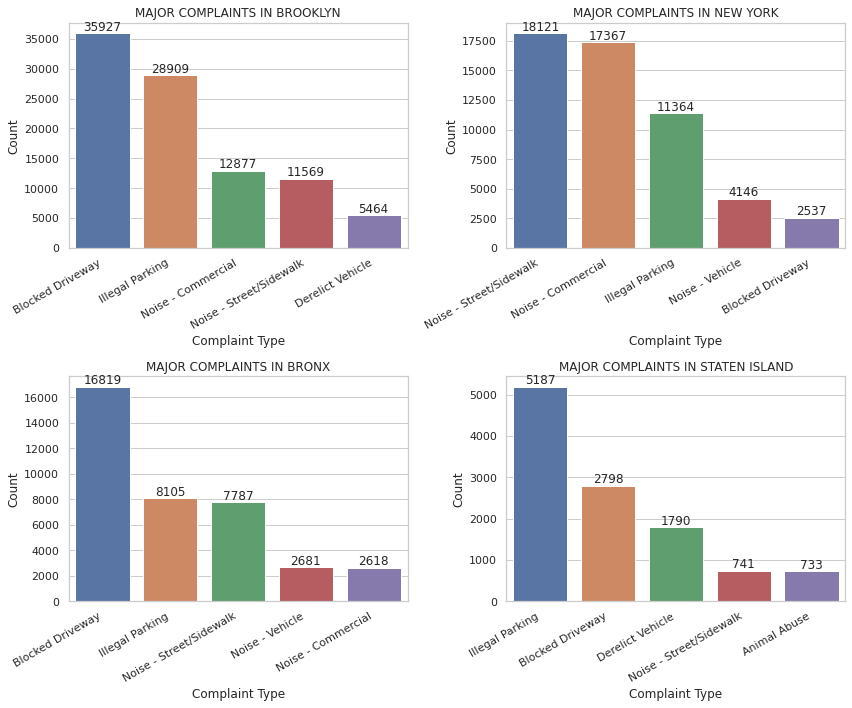

In [30]:
#Creating separate DataFrame for cities with City and Complaint Type columns
df_City=df[['City', 'Complaint Type']].groupby(['City', 'Complaint Type']).size().reset_index()
df_City.rename(columns={0:'Count'},inplace=True)

#Plots for BROOKLYN, NEW YORK, BRONX, and STATEN ISLAND
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

#Code for plot titles
ax[0,0].set_title('MAJOR COMPLAINTS IN BROOKLYN')
ax[0,1].set_title('MAJOR COMPLAINTS IN NEW YORK')
ax[1,0].set_title('MAJOR COMPLAINTS IN BRONX')
ax[1,1].set_title('MAJOR COMPLAINTS IN STATEN ISLAND')

df_MajorComplaints=df_City[df_City['City']=='BROOKLYN']
df_MajorComplaints=df_MajorComplaints.nlargest(5, "Count")
B= sns.barplot(ax=ax[0,0],x=df_MajorComplaints['Complaint Type'], y=df_MajorComplaints['Count'],)
B.set_xticklabels(B.get_xticklabels(), rotation=30, ha="right")
for i in B.containers:
    B.bar_label(i,)  


df_MajorComplaints=df_City[df_City['City']=='NEW YORK']
df_MajorComplaints=df_MajorComplaints.nlargest(5, "Count")
NY= sns.barplot(ax=ax[0,1],x=df_MajorComplaints['Complaint Type'], y=df_MajorComplaints['Count'],)
NY.set_xticklabels(NY.get_xticklabels(), rotation=30, ha="right")
for i in NY.containers:
    NY.bar_label(i,)  


df_MajorComplaints=df_City[df_City['City']=='BRONX']
df_MajorComplaints=df_MajorComplaints.nlargest(5, "Count")
BR= sns.barplot(ax=ax[1,0],x=df_MajorComplaints['Complaint Type'], y=df_MajorComplaints['Count'],)
BR.set_xticklabels(BR.get_xticklabels(), rotation=30, ha="right")
for i in BR.containers:
    BR.bar_label(i,)  


df_MajorComplaints=df_City[df_City['City']=='STATEN ISLAND']
df_MajorComplaints=df_MajorComplaints.nlargest(5, "Count")
SI= sns.barplot(ax=ax[1,1],x=df_MajorComplaints['Complaint Type'], y=df_MajorComplaints['Count'],)
SI.set_xticklabels(SI.get_xticklabels(), rotation=30, ha="right")
for i in SI.containers:
    SI.bar_label(i,)  
plt.tight_layout()



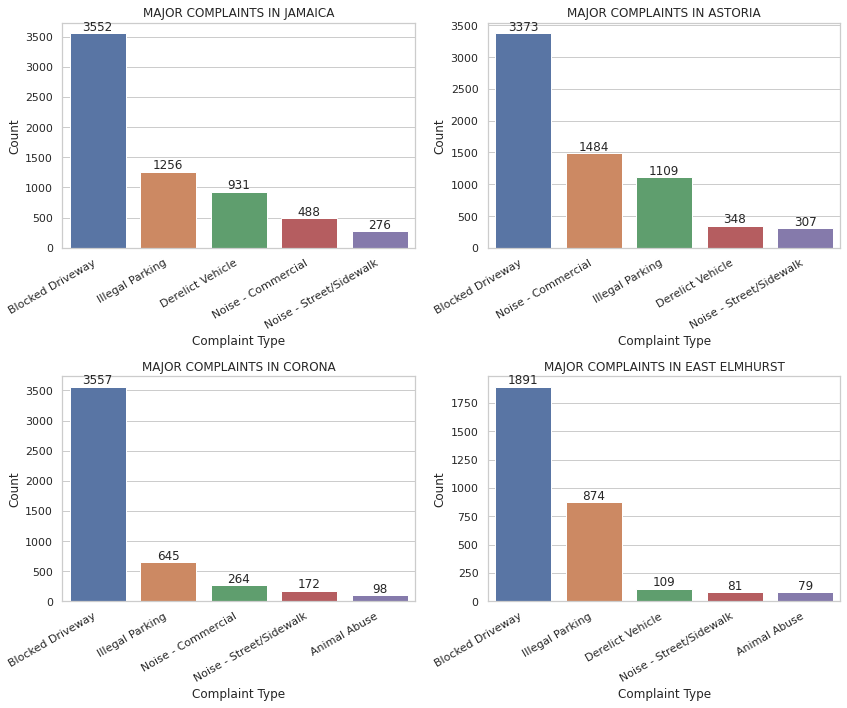

In [31]:
#Plots for JAMAICA, ASTORIA, CORONA, and EAST ELMHURST
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

#Code for plot titles
ax[0,0].set_title('MAJOR COMPLAINTS IN JAMAICA')
ax[0,1].set_title('MAJOR COMPLAINTS IN ASTORIA')
ax[1,0].set_title('MAJOR COMPLAINTS IN CORONA')
ax[1,1].set_title('MAJOR COMPLAINTS IN EAST ELMHURST')

df_MajorComplaints=df_City[df_City['City']=='JAMAICA']
df_MajorComplaints=df_MajorComplaints.nlargest(5, "Count")
J= sns.barplot(ax=ax[0,0],x=df_MajorComplaints['Complaint Type'], y=df_MajorComplaints['Count'],)
J.set_xticklabels(J.get_xticklabels(), rotation=30, ha="right")
for i in J.containers:
    J.bar_label(i,)  


df_MajorComplaints=df_City[df_City['City']=='ASTORIA']
df_MajorComplaints=df_MajorComplaints.nlargest(5, "Count")
AS= sns.barplot(ax=ax[0,1],x=df_MajorComplaints['Complaint Type'], y=df_MajorComplaints['Count'],)
AS.set_xticklabels(AS.get_xticklabels(), rotation=30, ha="right")
for i in AS.containers:
    AS.bar_label(i,)  


df_MajorComplaints=df_City[df_City['City']=='CORONA']
df_MajorComplaints=df_MajorComplaints.nlargest(5, "Count")
CO= sns.barplot(ax=ax[1,0],x=df_MajorComplaints['Complaint Type'], y=df_MajorComplaints['Count'],)
CO.set_xticklabels(CO.get_xticklabels(), rotation=30, ha="right")
for i in CO.containers:
    CO.bar_label(i,)  


df_MajorComplaints=df_City[df_City['City']=='EAST ELMHURST']
df_MajorComplaints=df_MajorComplaints.nlargest(5, "Count")
EE= sns.barplot(ax=ax[1,1],x=df_MajorComplaints['Complaint Type'], y=df_MajorComplaints['Count'],)
EE.set_xticklabels(EE.get_xticklabels(), rotation=30, ha="right")
for i in EE.containers:
    EE.bar_label(i,)  
plt.tight_layout()

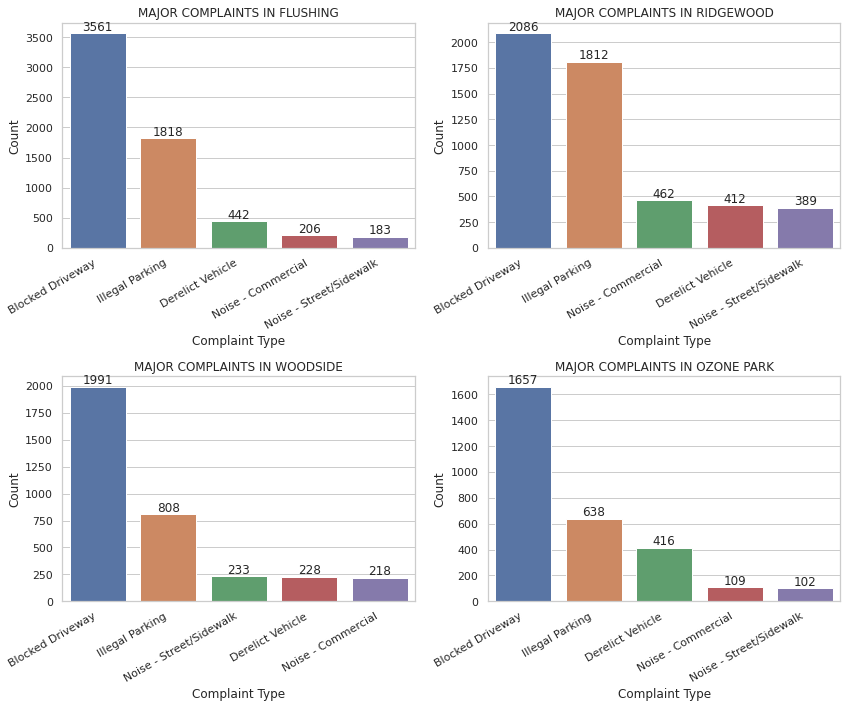

In [32]:
#Plots for FLUSHING, RIDGEWOOD, WOODSIDE, and OZONE PARK
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

#Code for plot titles
ax[0,0].set_title('MAJOR COMPLAINTS IN FLUSHING')
ax[0,1].set_title('MAJOR COMPLAINTS IN RIDGEWOOD')
ax[1,0].set_title('MAJOR COMPLAINTS IN WOODSIDE')
ax[1,1].set_title('MAJOR COMPLAINTS IN OZONE PARK')


df_MajorComplaints=df_City[df_City['City']=='FLUSHING']
df_MajorComplaints=df_MajorComplaints.nlargest(5, "Count")
F= sns.barplot(ax=ax[0,0],x=df_MajorComplaints['Complaint Type'], y=df_MajorComplaints['Count'],)
F.set_xticklabels(F.get_xticklabels(), rotation=30, ha="right")
for i in F.containers:
    F.bar_label(i,)  



df_MajorComplaints=df_City[df_City['City']=='RIDGEWOOD']
df_MajorComplaints=df_MajorComplaints.nlargest(5, "Count")
RW= sns.barplot(ax=ax[0,1],x=df_MajorComplaints['Complaint Type'], y=df_MajorComplaints['Count'],)
RW.set_xticklabels(RW.get_xticklabels(), rotation=30, ha="right")
for i in RW.containers:
    RW.bar_label(i,)  


df_MajorComplaints=df_City[df_City['City']=='WOODSIDE']
df_MajorComplaints=df_MajorComplaints.nlargest(5, "Count")
W= sns.barplot(ax=ax[1,0],x=df_MajorComplaints['Complaint Type'], y=df_MajorComplaints['Count'],)
W.set_xticklabels(W.get_xticklabels(), rotation=30, ha="right")
for i in W.containers:
    W.bar_label(i,)  


df_MajorComplaints=df_City[df_City['City']=='OZONE PARK']
df_MajorComplaints=df_MajorComplaints.nlargest(5, "Count")
OP= sns.barplot(ax=ax[1,1],x=df_MajorComplaints['Complaint Type'], y=df_MajorComplaints['Count'],)
OP.set_xticklabels(OP.get_xticklabels(), rotation=30, ha="right")
for i in OP.containers:
    OP.bar_label(i,)  
plt.tight_layout()

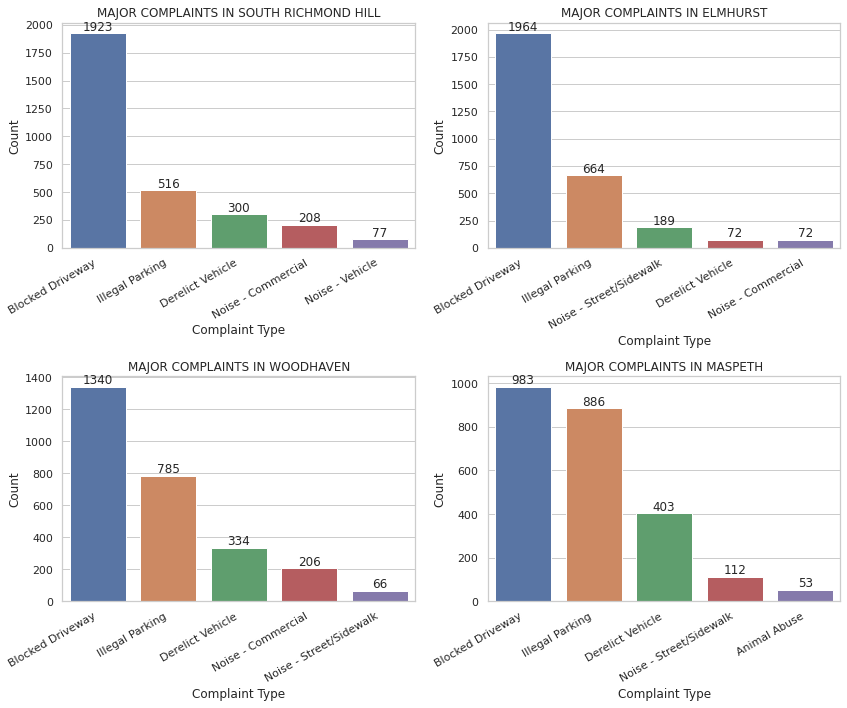

In [33]:
#Plots for SOUTH RICHMOND HILL, ELMHURST, WOODHAVEN, and MASPETH
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

#Code for plot titles
ax[0,0].set_title('MAJOR COMPLAINTS IN SOUTH RICHMOND HILL')
ax[0,1].set_title('MAJOR COMPLAINTS IN ELMHURST')
ax[1,0].set_title('MAJOR COMPLAINTS IN WOODHAVEN')
ax[1,1].set_title('MAJOR COMPLAINTS IN MASPETH')

df_MajorComplaints=df_City[df_City['City']=='SOUTH RICHMOND HILL']
df_MajorComplaints=df_MajorComplaints.nlargest(5, "Count")
SRH= sns.barplot(ax=ax[0,0],x=df_MajorComplaints['Complaint Type'], y=df_MajorComplaints['Count'],)
SRH.set_xticklabels(SRH.get_xticklabels(), rotation=30, ha="right")
for i in SRH.containers:
    SRH.bar_label(i,)  

df_MajorComplaints=df_City[df_City['City']=='ELMHURST']
df_MajorComplaints=df_MajorComplaints.nlargest(5, "Count")
E= sns.barplot(ax=ax[0,1],x=df_MajorComplaints['Complaint Type'], y=df_MajorComplaints['Count'],)
E.set_xticklabels(E.get_xticklabels(), rotation=30, ha="right")
for i in E.containers:
    E.bar_label(i,)  


df_MajorComplaints=df_City[df_City['City']=='WOODHAVEN']
df_MajorComplaints=df_MajorComplaints.nlargest(5, "Count")
WH= sns.barplot(ax=ax[1,0],x=df_MajorComplaints['Complaint Type'], y=df_MajorComplaints['Count'],)
WH.set_xticklabels(WH.get_xticklabels(), rotation=30, ha="right")
for i in WH.containers:
    WH.bar_label(i,)  


df_MajorComplaints=df_City[df_City['City']=='MASPETH']
df_MajorComplaints=df_MajorComplaints.nlargest(5, "Count")
M= sns.barplot(ax=ax[1,1],x=df_MajorComplaints['Complaint Type'], y=df_MajorComplaints['Count'],)
M.set_xticklabels(M.get_xticklabels(), rotation=30, ha="right")
for i in M.containers:
    M.bar_label(i,)  
plt.tight_layout()

# AVERAGE RESPONSE TIME ACROSS VARIOUS COMPLAINT TYPES

In [34]:
#Converting to datetime format
df['Created Date']=pd.to_datetime(df['Created Date'])
df['Closed Date']=pd.to_datetime(df['Closed Date'])
df['Response Time']= df['Closed Date']-df['Created Date']

df_ResponceTime_AcrossComplaints = df[['Complaint Type','Response Time']]
df_ResponceTime_AcrossComplaints['Response Time in Hours']=np.around( (df_ResponceTime_AcrossComplaints['Response Time'].astype(np.int64)/(pow(10,9)*3600) ), decimals=2)
df_Ave_Res_Time=df_ResponceTime_AcrossComplaints[['Complaint Type','Response Time in Hours']].groupby(['Complaint Type']).mean().reset_index()
df_Ave_Res_Time.rename(columns={'Response Time in Hours':'Average Response Time in Hours'},inplace=True)
df_Ave_Res_Time

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Complaint Type,Average Response Time in Hours
0,Animal Abuse,5.124719
1,Bike/Roller/Skate Chronic,3.339573
2,Blocked Driveway,4.506658
3,Derelict Vehicle,6.928305
4,Disorderly Youth,3.504880
5,Drinking,3.822824
6,Graffiti,5.516594
7,Homeless Encampment,4.336380
8,Illegal Fireworks,3.156136
9,Illegal Parking,4.327430


In [35]:
df_Ave_Res_Time['Average Response Time in Hours'].mean()

3.975351095199801

# OBSERVATION:

## Average Response Time for 'Derelict Vehicle' is highest (6.928305 hours)

## Average Response Time for 'Posting Advertisement' is lowest (1.930636 hours)

## Mean of Average Response Time across all complaints = 3.975351095199801